In [ ]:
!pip install ultralytics opencv-python numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 796.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 19.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics import YOLO
from google.colab import files
uploaded = files.upload()  # Upload images
image_files = list(uploaded.keys())  # Get file names
print("Uploaded files:", image_files)


Saving lane4.jpeg to lane4 (5).jpeg
Uploaded files: ['lane4 (5).jpeg']


In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload images
image_files = list(uploaded.keys())  # Get file names
print("Uploaded files:", image_files)


Saving Screenshot 2025-03-04 at 9.49.19 PM.png to Screenshot 2025-03-04 at 9.49.19 PM.png
Uploaded files: ['Screenshot 2025-03-04 at 9.49.19\u202fPM.png']


In [ ]:
model = YOLO("yolov8n.pt")  # Using YOLOv8 nano model (can change to yolov8m.pt for better accuracy)


In [ ]:
import cv2
import pandas as pd

# Class IDs for vehicle categories in COCO dataset
vehicle_classes = {2: "car", 3: "2-wheeler", 5: "bus", 7: "truck", 1: "2-wheeler"}

# Create a DataFrame to store results
df = pd.DataFrame(columns=["Image", "Total Vehicles", "Cars", "2-Wheelers", "Buses", "Trucks"])

for image_path in image_files:
    img = cv2.imread(image_path)  # Read image
    results = model(img, conf=0.5)  # Run YOLO model with confidence threshold

    vehicle_count = 0
    vehicle_counts = {"car": 0, "2-wheeler": 0, "bus": 0, "truck": 0}

    print(f"\nProcessing Image: {image_path}")

    # Process YOLO detections
    for r in results:
        for i, box in enumerate(r.boxes):
            cls = int(box.cls[0])  # Get class ID

            # Debugging Print Statements
            label = vehicle_classes.get(cls, "Unknown")
            print(f"Detection {i+1}: Class ID = {cls}, Label = {label}, Confidence = {box.conf[0]:.2f}")

            if cls in vehicle_classes:
                vehicle_count += 1
                vehicle_counts[label] += 1  # Count vehicles by type

    # Append results to DataFrame
    df.loc[len(df)] = [image_path, vehicle_count, vehicle_counts["car"], vehicle_counts["2-wheeler"], vehicle_counts["bus"], vehicle_counts["truck"]]

# Display the DataFrame as a table
print("\nVehicle Count Results:")
display(df)



0: 448x640 12 cars, 2 trucks, 267.1ms
Speed: 7.2ms preprocess, 267.1ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640)

Processing Image: Screenshot 2025-03-04 at 9.49.19 PM.png
Detection 1: Class ID = 7, Label = truck, Confidence = 0.90
Detection 2: Class ID = 2, Label = car, Confidence = 0.87
Detection 3: Class ID = 2, Label = car, Confidence = 0.87
Detection 4: Class ID = 2, Label = car, Confidence = 0.85
Detection 5: Class ID = 2, Label = car, Confidence = 0.85
Detection 6: Class ID = 2, Label = car, Confidence = 0.84
Detection 7: Class ID = 2, Label = car, Confidence = 0.79
Detection 8: Class ID = 2, Label = car, Confidence = 0.76
Detection 9: Class ID = 7, Label = truck, Confidence = 0.76
Detection 10: Class ID = 2, Label = car, Confidence = 0.75
Detection 11: Class ID = 2, Label = car, Confidence = 0.66
Detection 12: Class ID = 2, Label = car, Confidence = 0.59
Detection 13: Class ID = 2, Label = car, Confidence = 0.57
Detection 14: Class ID = 2, Label = car, C

,Image,Total Vehicles,Cars,2-Wheelers,Buses,Trucks
0,Screenshot 2025-03-04 at 9.49.19 PM.png,14,12,0,0,2


In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics import YOLO
from google.colab import files

# 🚀 Upload multiple images at once
uploaded = files.upload()
image_files = list(uploaded.keys())  # Store all uploaded filenames

print(f"\n📂 Uploaded Files: {image_files}")  # Debugging statement

# Load YOLO model (Using YOLOv8n for faster processing, upgrade to YOLOv8m for better accuracy)
model = YOLO("yolov8n.pt")

# 🚗 Define vehicle classes (from COCO dataset)
vehicle_classes = {2: "car", 3: "2-wheeler", 5: "bus", 7: "truck", 1: "2-wheeler"}  # Bicycle & Motorcycle → 2-Wheeler

# 📝 Create a DataFrame to store results
df = pd.DataFrame(columns=["Image", "Total Vehicles", "Cars", "2-Wheelers", "Buses", "Trucks"])

# 🔄 Process each uploaded image
for image_path in image_files:
    print(f"\n🔍 Processing Image: {image_path}")  # Debugging statement

    img = cv2.imread(image_path)  # Read the uploaded image
    img = cv2.resize(img, (1280, 720))  # Resize image for better detection

    # 🔬 Run YOLO model for object detection
    results = model(img, conf=0.3, augment=True)  # Lower confidence threshold to detect more objects

    vehicle_count = 0
    vehicle_counts = {"car": 0, "2-wheeler": 0, "bus": 0, "truck": 0}

    # 📦 Extract detections
    boxes = results[0].boxes.xyxy.cpu().numpy()  # Bounding boxes
    scores = results[0].boxes.conf.cpu().numpy()  # Confidence scores
    labels = results[0].boxes.cls.cpu().numpy().astype(int)  # Class IDs

    # 🛑 Apply Non-Maximum Suppression (NMS) to remove overlapping detections
    indices = cv2.dnn.NMSBoxes(boxes.tolist(), scores.tolist(), 0.3, 0.4)

    if len(indices) > 0:
        for i in indices.flatten():
            cls = labels[i]  # Get class ID
            if cls in vehicle_classes:
                vehicle_count += 1
                label = vehicle_classes[cls]  # Get class name
                vehicle_counts[label] += 1  # Count by type

    # 📊 Append results to DataFrame
    df.loc[len(df)] = [
        image_path, vehicle_count, vehicle_counts["car"], vehicle_counts["2-wheeler"],
        vehicle_counts["bus"], vehicle_counts["truck"]
    ]

# 🏆 Display the final DataFrame
print("\n🚗 Final Vehicle Count Results:")
display(df)


Saving lane 9.webp to lane 9 (1).webp
Saving lane2.jpeg to lane2 (6).jpeg
Saving lane4.jpeg to lane4 (10).jpeg
Saving Screenshot 2025-03-04 at 9.49.19 PM.png to Screenshot 2025-03-04 at 9.49.19 PM (2).png

📂 Uploaded Files: ['lane 9 (1).webp', 'lane2 (6).jpeg', 'lane4 (10).jpeg', 'Screenshot 2025-03-04 at 9.49.19\u202fPM (2).png']

🔍 Processing Image: lane 9 (1).webp

0: 384x640 2 buss, 373.4ms
Speed: 7.7ms preprocess, 373.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

🔍 Processing Image: lane2 (6).jpeg

0: 384x640 8 cars, 2 trucks, 337.8ms
Speed: 3.5ms preprocess, 337.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

🔍 Processing Image: lane4 (10).jpeg

0: 384x640 2 cars, 338.5ms
Speed: 3.7ms preprocess, 338.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

🔍 Processing Image: Screenshot 2025-03-04 at 9.49.19 PM (2).png

0: 384x640 12 cars, 1 bus, 2 trucks, 329.7ms
Speed: 3.4ms preprocess, 329.7ms inference, 1.6ms postproc

,Image,Total Vehicles,Cars,2-Wheelers,Buses,Trucks
0,lane 9 (1).webp,2,0,0,2,0
1,lane2 (6).jpeg,7,6,0,0,1
2,lane4 (10).jpeg,2,2,0,0,0
3,Screenshot 2025-03-04 at 9.49.19 PM (2).png,9,7,0,0,2


In [ ]:
# 🚦 Assume Red Light Durations for Each Lane (in seconds)
red_light_times = {"lane1": 30, "lane2": 40, "lane3": 35, "lane4": 45}

# Extract vehicle counts from DataFrame
vehicle_counts = df["Total Vehicles"].tolist()

# Ensure we have exactly 4 lanes
if len(vehicle_counts) < 4:
    print("⚠ Warning: Less than 4 lanes detected. Adjusting lanes...")
    while len(vehicle_counts) < 4:
        vehicle_counts.append(0)  # Fill missing lanes with 0 vehicles

# 🚗 Calculate Traffic Flow for Each Lane
traffic_flow = {f"Way {i+1}": vehicle_counts[i] / red_light_times[f"lane{i+1}"] for i in range(4)}

# Convert to vehicles per hour
traffic_flow_per_hour = {lane: flow * 3600 for lane, flow in traffic_flow.items()}

# 📊 Store Traffic Flow Results in DataFrame
traffic_df = pd.DataFrame({
    "Way": list(traffic_flow.keys()),
    "Total Vehicles": vehicle_counts,
    "Red Light Time (s)": list(red_light_times.values()),
    "Traffic Flow (vehicles/sec)": list(traffic_flow.values()),
    "Traffic Flow (vehicles/hour)": list(traffic_flow_per_hour.values())
})

# 🏆 Display Traffic Flow DataFrame
print("\n🚦 Final Traffic Flow Results:")
display(traffic_df)



🚦 Final Traffic Flow Results:


,Way,Total Vehicles,Red Light Time (s),Traffic Flow (vehicles/sec),Traffic Flow (vehicles/hour)
0,Way 1,2,30,0.066667,240.000000
1,Way 2,7,40,0.175000,630.000000
2,Way 3,2,35,0.057143,205.714286
3,Way 4,9,45,0.200000,720.000000


In [ ]:
!pip install pandas scikit-learn numpy matplotlib


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 🚦 Define Features & Labels for Training
features = ["Total Vehicles", "Traffic Flow (vehicles/sec)", "Red Light Time (s)"]
X = traffic_df[features]  # Input Features
y = traffic_df["Red Light Time (s)"]  # Target Variable (Green Light Duration)

# 🔄 Scale Data for Better Training
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🎯 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🎯 Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("✅ Random Forest Model Trained on Live Traffic Flow Data!")


✅ Random Forest Model Trained on Live Traffic Flow Data!


In [ ]:
def determine_best_lane(traffic_df):
    """
    Determines the best lane based on:
    1️⃣ Highest Vehicle Count
    2️⃣ If tie → Highest Priority Vehicles (bus/truck)
    3️⃣ If still tie → Highest Traffic Flow
    """

    # Step 1️⃣: Find lane(s) with the maximum number of vehicles
    max_vehicles = traffic_df["Total Vehicles"].max()
    lanes_with_max_vehicles = traffic_df[traffic_df["Total Vehicles"] == max_vehicles]

    if len(lanes_with_max_vehicles) == 1:
        best_lane = lanes_with_max_vehicles.iloc[0]["Lane"]

    else:
        # Step 2️⃣: Prioritize lane with most priority vehicles (bus/truck)
        lanes_with_max_priority = lanes_with_max_vehicles.copy()
        lanes_with_max_priority["Priority Score"] = (
            lanes_with_max_priority["Buses"] * 3 +
            lanes_with_max_priority["Trucks"] * 3 +
            lanes_with_max_priority["Cars"] * 2 +
            lanes_with_max_priority["2-Wheelers"] * 1
        )

        max_priority = lanes_with_max_priority["Priority Score"].max()
        best_priority_lanes = lanes_with_max_priority[lanes_with_max_priority["Priority Score"] == max_priority]

        if len(best_priority_lanes) == 1:
            best_lane = best_priority_lanes.iloc[0]["Lane"]
        else:
            # Step 3️⃣: If still tie, use traffic flow
            best_lane = best_priority_lanes.loc[best_priority_lanes["Traffic Flow (vehicles/sec)"].idxmax(), "Lane"]

    return best_lane


In [ ]:
# 🎥 Get latest real-time traffic flow data dynamically
latest_traffic = traffic_df.iloc[-1][features]  # Use latest detected lane data

# 🔄 Scale Real-Time Data
latest_scaled = scaler.transform([latest_traffic])

# 🎯 Predict Green Light Duration
predicted_green_time = rf_model.predict(latest_scaled)[0]

# 🎯 Predict Best Lane to Give Green Light
best_lane = determine_best_lane(traffic_df)

print(f"🚦 Best Way for Green Light: {best_lane}")
print(f"⏳ Predicted Green Light Time: {predicted_green_time:.2f} seconds")


🚦 Best Way for Green Light: Lane 4
⏳ Predicted Green Light Time: 41.40 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
!pip install stable-baselines3 sumo_rl traci gym numpy matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 847.8/847.8 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.9/150.9 kB 10.8 MB/s eta 0:00:00
  Attempting uninstall: gymnasium
    Found existing installation: gymnasium 1.1.0
    Uninstalling gymnasium-1.1.0:
      Successfully uninstalled gymnasium-1.1.0


In [ ]:
import os
os.environ["SUMO_HOME"] = "/usr/share/sumo"
os.environ["PYTHONPATH"] = os.environ["SUMO_HOME"] + "/tools"


In [ ]:
import traci
print("SUMO Installed Successfully!")


SUMO Installed Successfully!


In [ ]:
!apt-get update
!apt-get install -y sumo sumo-tools sumo-doc


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [68.9 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,338 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,666 kB]
Get:13 http://archive.ubuntu.com/ubunt

In [ ]:
import traci
print("SUMO Installed Successfully!")


SUMO Installed Successfully!


In [ ]:
import gym
import numpy as np
import sumo_rl
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

# 🚦 Create SUMO Environment for Traffic Light Control
env = gym.make("sumo_rl:grid4x4-v0", use_gui=True)

# 📌 Wrap Environment for Parallel Training
vec_env = make_vec_env(lambda: env, n_envs=1)

# 🎯 Define PPO RL Model (Proximal Policy Optimization)
model = PPO("MlpPolicy", vec_env, verbose=1)

# 🚀 Train the RL Agent using Traffic Flow Data
model.learn(total_timesteps=50000)  # Adjust based on dataset size

# 🎯 Save Trained RL Model
model.save("ppo_traffic_light")
print("✅ RL Model Trained and Saved!")


NameNotFound: Environment grid4x4 doesn't exist. 

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or ‘Colaboratory’, allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a <strong>student</strong>, a <strong>data scientist</strong> or an <strong>AI researcher</strong>, Colab can make your work easier. Watch <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introduction to Colab</a> to find out more, or just get started below!

<div class="markdown-google-sans">

## <strong>Getting started</strong>
</div>

The document that you are reading is not a static web page, but an interactive environment called a <strong>Colab notebook</strong> that lets you write and execute code.

For example, here is a <strong>code cell</strong> with a short Python script that computes a value, stores it in a variable and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut 'Command/Ctrl+Enter'. To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine <strong>executable code</strong> and <strong>rich text</strong> in a single document, along with <strong>images</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To find out more, see <a href="/notebooks/basic_features_overview.ipynb">Overview of Colab</a>. To create a new Colab notebook you can use the File menu above, or use the following link: <a href="http://colab.research.google.com#create=true">Create a new Colab notebook</a>.

Colab notebooks are Jupyter notebooks that are hosted by Colab. To find out more about the Jupyter project, see <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyse and visualise data. The code cell below uses <strong>numpy</strong> to generate some random data, and uses <strong>matplotlib</strong> to visualise it. To edit the code, just click the cell and start editing.

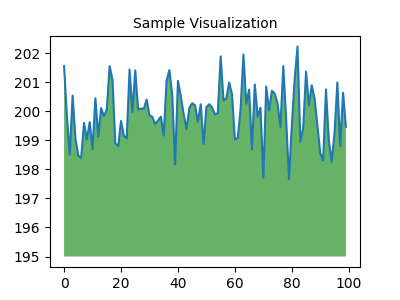

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from GitHub and many other sources. To find out more about importing data, and how Colab can be used for data science, see the links below under <a href="#working-with-data">Working with data</a>.

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">a few lines of code</a>. Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including <a href="#using-accelerated-hardware">GPUs and TPUs</a>, regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the <a href="#machine-learning-examples">machine learning examples</a> below.

<div class="markdown-google-sans">

## More resources

### Working with notebooks in Colab

</div>

- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with data
</div>

- [Loading data: Drive, Sheets and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualising data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine learning crash course

<div>

These are a few of the notebooks from Google's online machine learning course. See the <a href="https://developers.google.com/machine-learning/crash-course/">full course website</a> for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using accelerated hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo voice swap</a>: Use Nvidia NeMo conversational AI toolkit to swap a voice in an audio fragment with a computer-generated one.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Retraining an Image Classifier</a>: Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Text Classification</a>: Classify IMDB film reviews as either <em>positive</em> or <em>negative</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Style Transfer</a>: Use deep learning to transfer style between images.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Multilingual Universal Sentence Encoder Q&amp;A</a>: Use a machine-learning model to answer questions from the SQuAD dataset.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Video Interpolation</a>: Predict what happened in a video between the first and the last frame.
